In [39]:
# Run this first so it's ready by the time you need it
install.packages("readr")
install.packages("dplyr")
install.packages("ggformula")
library(readr)
library(dplyr)
library(ggformula)


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpkRkf65/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpkRkf65/downloaded_packages

The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpkRkf65/downloaded_packages


# Chapter 15 - Models with Categorical Outcomes

Thus far in the course, we've explored a great many types of models that the general linear model framework can handle. This gives us a large amount of flexibility in the types of research questions we can answer with statistics. Hopefully you are beginning to appreciate how understanding the fundamentals of the general linear model can open a great many avenues of inquiry for you. The general linear model is not the only way to do statistics (there are more advanced statistics classes you can take that will teach you different approaches for specific problems), but it is an extremely powerful one to start with.

The last major class of general linear model that we will learn in this course will address one thing we've been leaving out so far. Across all the regressions, interactions, nonparametric tests with all sorts of predictors and relationships between predictors, one thing has been contast - we've always been predicting a *continuous* outcome variable. Of course, there are research questions concerning categorical outcome variables as well. What political party is someone likely to join, whether or not someone is admitted to college, etc. These sorts of models are called **logistic regression**, and we will cover them here. 

## 15.1 Non-continuous outcomes

Standard regression models are linear combinations of parameters estimated from the data. Multiplying these parameters by different values of the predictor variables (or by each other) gives estimates of the outcome.

However, because there’s no hard limit on the range of predictor variables (at least, no limit coded into the model itself), the predictions of a linear model in theory range between negative -∞ (infinity) and +∞. Although values approaching infinity might be very unlikely, there is no hard limit on either the parameters we fit (the regression coefficients) or the predictor values themselves.

When outcome data are continuous or somewhat like a continuous variable this isn’t usually a problem. Although our models might predict some improbable values (for example, that someone is 8 feet tall), they will not often be strictly impossible.

It might occur to you at this point that, if a model predicted a height of -8 feet or a temperature below absolute zero, then this *would* be impossible. And this is true, and a theoretical violation of the assumption of the linear model that the outcome can range betweem -∞ (infinity) and +∞ (we'll talk more about the assumptions the GLM makes in chapter 20, and what violates those assumptions). Despite this, researchers use linear regression to predict many outcomes which have this type of range restriction and, although models can make strange predictions in edge cases, they are useful and can make good predictions most of the time.

However, for other types of outcomes like categories, this often won’t be the case. Standard linear regression will fail to make sensible predictions even in cases that are not unusual.

One of the most common cases where this occurs is when you're trying to predict a binary outcome, yes or no. We already learned in simple regression how expressing this as a dummy-coded number, 1 or 0, let's us do math with it. That is also why we choose to express categorical outcome variables with dummy codes.

But hang on. When a dummy variable is an outcome, no other option outside the range of 0 to 1 is possible, and no other option *between* these values is possible either. This poses a problem for predictions based off a continuous regression line like in linear regression, where all possible inputs can be operated on to produce theoretically all possible output values. 

Let's see a demonstration of this. We have some medical data about patients with kidney disease from [this dataset](https://matthew-brett.github.io/cfd2020/data/chronic_kidney_disease.html). 

In [40]:
kidney_disease <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/ckd.csv")
head(kidney_disease)

Rows: 158 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Red Blood Cells, Pus Cell, Pus Cell clumps, Bacteria, Hypertension...
dbl (15): Age, Blood Pressure, Specific Gravity, Albumin, Sugar, Blood Gluco...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,⋯,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,⋯,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,⋯,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.010,3,2,normal,abnormal,present,present,157,⋯,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,⋯,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,⋯,32,6900,3.4,yes,no,no,good,no,yes,1


In this dataset are two variables ```Appetite``` and ```Hemoglobin```. In people with kidney disease, their body produces lower levels of hemoglobin, the molecule that carries oxygen around in the bloodstream. Concentrations of hemoglobin can be used as a measure of kidney disease severity. Let's say we want to use this variable to predict whether or not someone tends to have a good or poor appetite.

First off, since linear models make numeric predictions, ```lm()``` will give an error if we try to have it predict a non-numeric data type:

In [ ]:
lm(Appetite ~ Hemoglobin, data = kidney_disease)

So let's manually make it into a dummy variable ourselves: 

In [41]:
kidney_disease$Appetite_dummy <- recode(kidney_disease$Appetite, "poor" = "0", "good" = "1")
kidney_disease$Appetite_dummy <- as.numeric(kidney_disease$Appetite_dummy)

#checking our work
str(kidney_disease$Appetite_dummy)

 num [1:158] 0 0 0 0 0 1 1 1 1 1 ...


Now that we have the dummy (1 or 0) variable, let's use a scatterplot to look at the relationship between hemoglobin concentration and whether a patient has a good appetite.

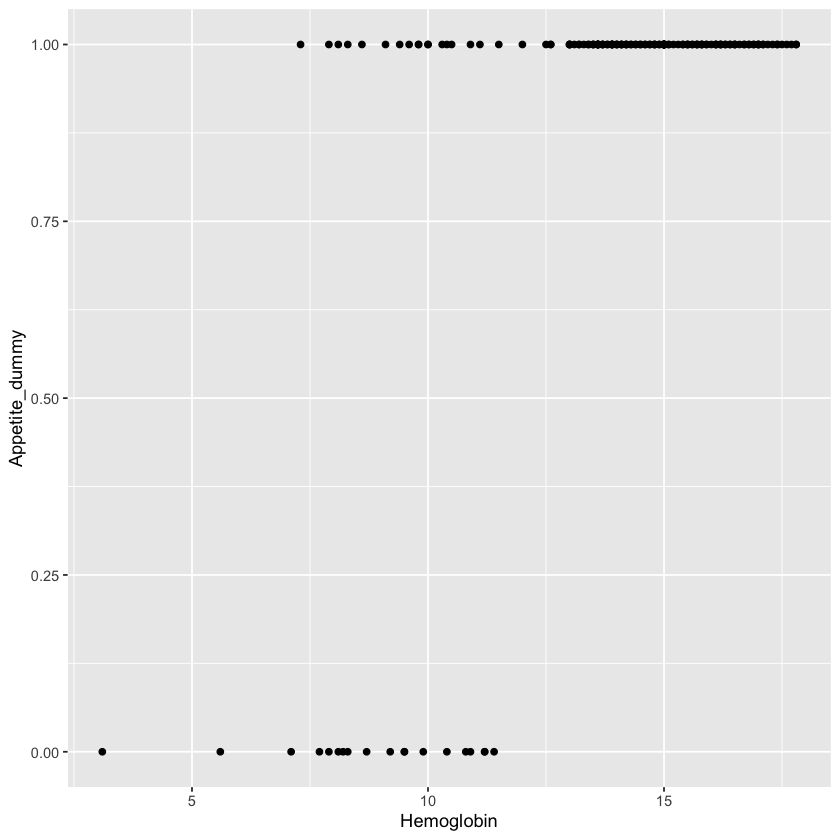

In [45]:
gf_point(Appetite_dummy ~ Hemoglobin, data = kidney_disease)

From the plot, it does look as if the patients with lower hemoglobin are more likely to have poor appetite (```Appetite_dummy``` values of 0), whereas patients with higher hemoglobin tend to have good appetite (```Appetite_dummy``` values of 1).

Remember in linear regression, we predict scores on the outcome variable using a straight-line relationship of the predictor variable. Why not use the same linear regression technique for our case to make predictions about patients' appetites? After all, the ```Appetite_dummy``` values are just numbers (0 and 1), as are our ```Hemoglobin``` values. Let's visualize what the regression line would look like on our data: 

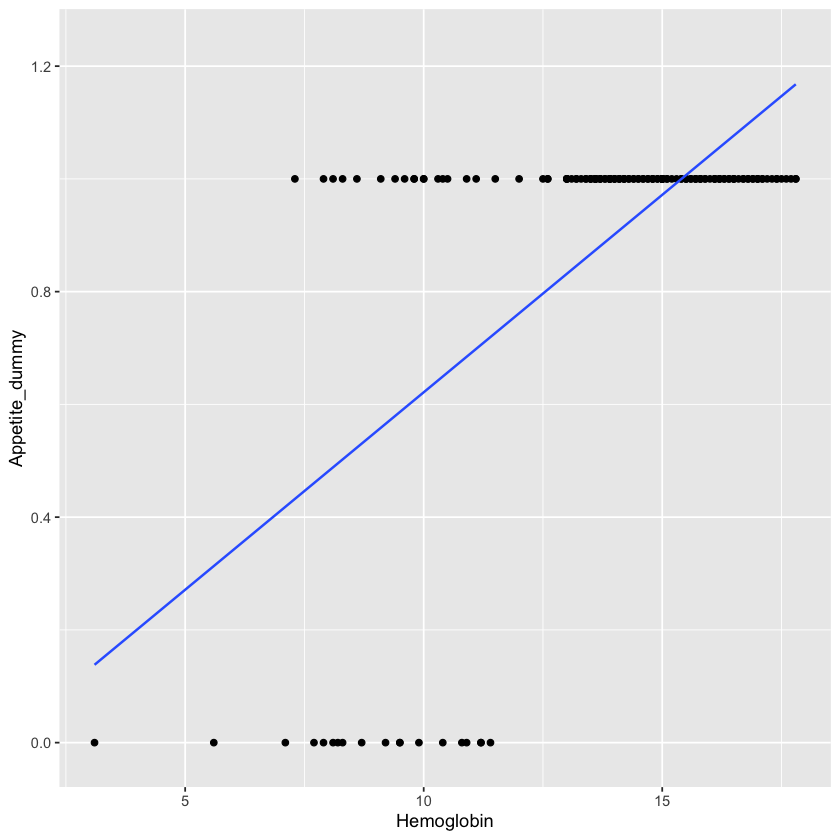

In [46]:
gf_point(Appetite_dummy ~ Hemoglobin, data = kidney_disease) %>% gf_lm()

The linear regression line looks plausible, in that it predicts that people with higher hemoglobin levels are probably going to have a better appetite. 

However, when the hemoglobin value gets higher than about 15.5, linear regression starts to predict a value for appetite that is greater than 1. This is not a realistic outcome value in the dummy appetite variable, which is restricted to 0 or 1. Unfortunately, hemoglobin values above 15.5 are very real and indeed common. 

Also, looking at the plot, without the regression line, it looks as if we can be fairly confident of predicting a 1 (“good”) value for a hemoglobin above 12.5, but we are increasingly less confident about predicting a 1 value as hemoglobin drops down to about 7.5, at which point we become confident about predicting a 0 value. However, a straight line doesn't accurately reflect these changes in confidence. It says each additional unit of hemoglobin should buy us a consistent amount of prediction confidence. 

These reflections make us wonder whether we should be using something other than a simple, unconstrained straight line for our predictions.

## 15.2 Logit link function

The answer to this in the GLM framework is to still make continuous predictions, but then translate those predictions into being either a 1 or 0 final answer. The mathematical tool for doing this kind of translation is called a **link function**. A link function, like the name suggests, is a separate mathematical function that *links* the output of a linear model to a corresponding value that makes sense in terms of the actual outcome variable. 

Simple linear regression actually has a link function too. It's just a trivial one, called the **identity function** - the linear model's prediction is mapped to an outcome value by its identity, its already-existing value. For other types of model different functions are used.

The link function in logistic regression is called the **logit function** (hence the name logistic regression). The logit function expresses category membership in terms of the *log odds* of being in that category. If we're predicting whether or not someone is admitted to college, their *likelihood* of admittance is what the prediction means.

### Log odds conversion - step 1
The first step in converting a binary categorical variable into log odds is to consider the probability of someone being in one category versus the other. Recall our discussion of probabilities back in chapter 8. Under a probability model, we can't determine the value of any one datapoint, but we know over the whole population of datapoints how many end up in one category versus another. We know the *probability* of category membership. When 9% of students are admitted to Pomona and 91% are not, there is a 9% likelihood that any one person will end up in the category "admitted." 

Probabilities thus allow us to express a binary outcome - admitted or not - as a probability of category membership. Thus, we can now express this variable as a continuous variable between 0 and 1. True data will always have a 0 or 1 value - when someone has *already* been admitted to college or rejected, the probability of their admittance is 100% or 0%. But when making predictions about new data points, their predicted probability can be anything between 0 and 1. Predictors in a logistic model help us make guesses about these probabilities.

### Log odds conversion - step 2
We now have a binary variable expressed as a continuous variable, but it is still bounded between 0 and 1. We can transform a probability on the 0—1 scale to a 0 → ∞ scale by converting it to **odds**, which are expressed as a ratio:

$$odds = \frac{p}{1-p} $$

Probabilities and odds ratios are two equivalent ways of expressing the same idea. So a probability of P(X) = 0.5 equates to an odds ratio of 1 (i.e. 1 to 1 or 1/1, which is what 0.5/(1-0.5) reduces to). P(X) = 0.6 equates to odds of 1.5 (that is, 1.5 to 1, or 3 to 2). And P(X) = 0.95 equates to an odds ratio of 19 (19 to 1).

Odds convert or map probabilities from 0 to 1 onto the real numbers from 0 to ∞.

<img src="images/ch15-probtoodds.png" width="500">

We can reverse the transformation (which is important later) like so:

$$probability = \frac{odds}{1 + odds} $$

### Log odds conversion - step 3
When we convert a probability to odds, the odds can go up to infinity, but will never be less than 0. This is still a problem for our linear model. We’d like our regression coefficients to be able to vary between -∞ and ∞.

To avoid this restriction, we can take the *logarithm* of the odds — sometimes called the **logit** for conciseness. The figure below shows the transformation of probabilities between 0 and 1 to the log-odds scale. 

<img src="images/ch15-probtologit.png" width="500">

The logit has two nice properties:

- It converts odds of less than one to negative numbers, because the log of a number between 0 and 1 is always negative.
- It flattens the rather square curve for the odds in the figure above, giving you more interpretability among different logit values. 

By doing these mathematical conversion steps, we can now express a binary 0-or-1 variable as a continuous variable, possibly ranging from -∞ to ∞. We can also this sigmoid-shaped regression line to make predictions of the log-odds of category membership, rather than relying on a straight line. 


## 15.4 Interpretting a logistic model

### Interpreting predictions
As we’ve seen here, the logit or logistic link function transforms probabilities between 0 and 1 to the range from negative to positive infinity. This means logistic regression coefficients are in log-odds units, so we must interpret logistic regression coefficients differently from regular regression with continuous outcomes. Consider the equation form of a simple logistic regression model:

$$logit(Y_i) = b_0 + b_1X_i + e_i$$

The right side of the equation, the actual model side, is built the same between a linear model and a logistic model. We still combine the values of predictors with coefficients in order to make predictions. However, in linear regression, a coefficient like b<sub>1</sub> means the change in the outcome (expressed with the outcome's units) for a unit change in the predictor.

For logistic regression, the same coefficient means the change in the *log odds* of the outcome being 1, for a unit change in the predictor.

If we want to interpret logistic regression in terms of probabilities, we need to undo the transformation described in steps 1 and 2. To do this:

- 1) We take the exponent of the logit to ‘undo’ the log transformation and get the predicted odds. Taking the exponent means calculating e<sup>y</sup>, where e is the special mathematical value 2.71828... and y is the logit. 

- 2) We convert the odds back to probability: prob = odds / (1 + odds) 

Here's a hypothetical example to walk through how to do this. Imagine if we have a model to predict whether a person has any children. The outcome is binary, so equals 1 if the person has any children, and 0 otherwise.

The model has an intercept and one predictor, age in years:

$$logit(children_i) = b_0 + b_1age_i + e_i$$

We fit this model and get two parameter estimates: b<sub>0</sub> = 0.5 and b<sub>1</sub> = 0.02.  

The outcome of the linear model is the log-odds of having any children. So to compute this for any particular person, we simply input their age as the value of the predictor. For someone aged 30, the predicted log-odds are:

$$0.5 + 0.02*30 = 1.1$$

In order to understand what that prediction means in terms of probabilities, we first take the exponent to find odds:

$$odds = e^{1.1} = 3.004166$$
 
That suggests there are 3 to 1 odds that a person aged 30 will have children. Lastly, we can use the conversion equation above to find probability:

$$probability = \frac{odds}{1 + odds} = \frac{3.004166}{1 + 3.004166} = 0.7502601$$
 
Thus, given our logistic regression model, we would predict that by taking a random person off the street who is 30 years old, not knowing anything else about them, there is a 75% chance that they have children. 
 
For someone aged 40:

$$0.5 + 0.02*40 = 1.3 $$

$$odds = e^{1.3} = 3.669297$$

$$probability = \frac{3.669297}{1 + 3.669297} = 0.785835$$

and so on.

### Interpreting coefficients
That's how to understand the predictions of a logistic model, the log odds of category membership. But what does that b<sub>1</sub> = 0.02 value mean for how the prediction *changes*, for each one-unit change in the predictor? It would be the change in the log odds of someone having children, for a one-year increase in age. You could leave it at that, but that's hard to wrap one's head around. 

If we take the exponent of 0.02, would that tell us how much odds are changing by? 

$$e^{0.02} = 1.020201$$

Unfortunately, no. If we interpreted things this way, it would imply that a a 31-year-old has 1.02 higher odds of having kids compared to a 30-year-old. I.e., 4.02 to 1, compared with 3 to 1. However, solving for the odds of a 31-year-old tells us that's not the case: 

$$0.5 + 0.02*31 = 1.12 $$

$$odds = e^{1.12} = 3.064854$$

Instead, an important feature of logs to know about is that subtracting the logs of two numbers is the same thing as taking the log of those numbers' ratio:

$$log(3.064854) - log(3.004166) = 0.02$$

$$log(\frac{3.064854}{3.004166}) = 0.02$$

You can verify this in the code window below: 

In [ ]:
log(3.064854) - log(3.004166)
log(3.064854/3.004166)

Thus, we can interpret the exponent of the coefficient b<sub>1</sub> = 0.02 as being the *ratio* of odds, for a one-unit change in predictor. In other words, e<sup>0.02</sup> = 1.02, so the odds of having kids is 1.02x great for each 1-year increase in someone's age. 

To take exponents in R, you can use the ```exp()``` function:

In [ ]:
exp(0.02)

Note that this is not the same as saying the *probability* of having kids is 1.02x greater for each 1-year increase in age. Probability is odds/(1+odds), so the probability that a 31-year-old has kids is:

In [ ]:
#probability of a 31-year-old having kids
3.064854 / (1 + 3.064854)

That's not the same thing as 1.02 times 0.7502601 (the probability of a 30-year-old having kids):

In [ ]:
1.02*0.7502601

In logistic regression, you have to be very careful with how you talk about the interpretations. 0.02 is the change in log odds for every one-unit increase in the predictor. e<sup>0.02</sup> is the multiplier of odds for every one-unit increase in the predictor. 

That's the case for a simple logistic regression. In a multiple logistic regression, there are multiple predictors. For example:

$$logit(children_i) = b_0 + b_1age_i + b_2married_i + e_i$$

This would be a model predicting how many children someone has, both from how old they are and whether or not they're married. 

Let's say when fitting this model, we estimate b<sub>0</sub> = 0.1, b<sub>1</sub> = 0.01, and b<sub>2</sub> = 1.3. The coefficients still speak to the change in predicted log-odds for every one-unit increase in the predictor, but we have to interpret that in the context of the other variable again. In this case, b<sub>1</sub> means the predicted change in log-odds (or multiplier of odds) of having children for every additional year in age, when holding marriage status constant. b<sub>2</sub> means the predicted change in log-odds (or multiplier of odds) of having children for someone who is married compared to someone who is not, when age is held constant.

Extending to the case of a logistic regression with an interaction: 

$$logit(children_i) = b_0 + b_1age_i + b_2married_i + b_3age_i*married_i + e_i$$

Make sure to interpret b<sub>3</sub> appropriately as an interaction coefficient, but in terms of log-odds of the outcome variable. Here, we might say it's the change in difference of log odds between people who are married and people who are not, for every year increase in their age. 

## 15.5 Visualizing a logistic model

For linear regression, piping ```gf_lm()``` from the ```ggformula``` package as another layer on a scatterplot draws the best-fitting straight regression line through the data. 

For a logistic model, you can also use ```gf_lm()``` to draw the relationship between a predictor variable and the log-odds of the outcome, since that is a linear relationship. However more frequently, you'll want to plot the relationship between the predictor and the raw outcome values directly. This sort of relationship, as we saw, has a sigmoid line shape. To get that sort of line added to a scatter plot, use the function ```gf_smooth()``` with some specific arguments to make it fit the appropriate sigmoid curve:

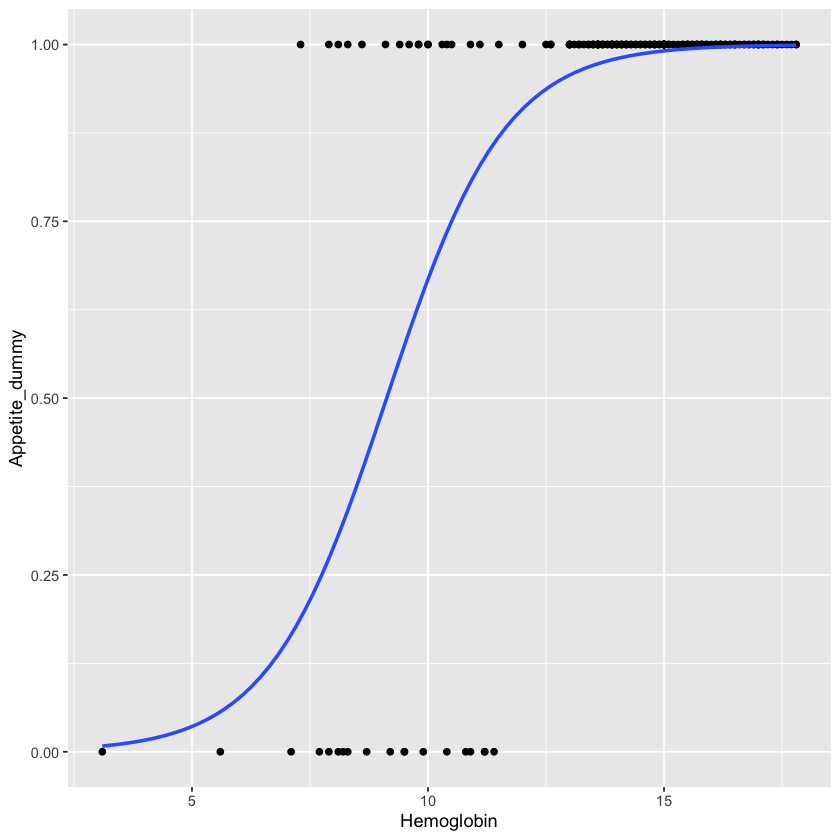

In [47]:
gf_point(Appetite_dummy ~ Hemoglobin, data = kidney_disease) %>% 
  gf_smooth(method="glm", method.args = list(family = "binomial"))

In a linear regression equation, the intercept coefficient controls where the line crosses the y-axis and the effect coefficient controls the steepness of the line's slope. In logistic regression it's a bit different. Since the raw outcome is bounded between 0 and 1, the line at X=0 will always cross the y-axis at Y=0 (the lowest possible value). 

Instead, the intercept of the logistic equation moves the logistic curve left or right on the x-axis: 

<img src="images/ch15-logisticintercepts.png" width="500">

The effect coefficient, or the slope of the logistic line, sets how steeply it increases or decreases:

<img src="images/ch15-logisticslopes.png" width="500">

## 15.6 Fitting logistic regression models

In R, the function ```lm()``` finds the best-fitting coefficients for the model in order to minimize error between predictions and true outcomes. However, the fact that real outcome data only have two unique values (0 and 1) makes it really hard to do this fitting process, when the predictions could be any real number value. If you convert a binary categorical variable into 0s and 1s and include that as the outcome in a linear model, the function will *run*, and give you an answer, but because the fitting process was flawed those coefficient estimates will be very inaccurate for making guesses about new data. 

To deal with this, we use a separate function: ```glm()```. This stands for ***generalized* linear model**. This function can fit any linear model, but will *generalize* to outcome variables of types other than continuous if you tell it to. In order to be sensitive to different data types, it takes an additional argument ```family =```. In the case of logistic regression, this argument should be set to ```family = binomial```, indicating that we're predicting binary data. 

In fact, we could use glm() to run the linear models we were building before. For that, we would set ```family = gaussian``` to tell it we're predicting gaussian-distributed data (another name for the continuous normal distribution). 

The upside of this function is that it can outcome data on any sort of distribution. The downside is that unlike ```lm()```, it won't automatically convert categorical variables to dummy variables for us. We have to do that manually. 

Let's go back to our kidney disease example and find the actual model that best predicts appetite from hemoglobin levels. We already created a dummy variable version of the appetite variable so we can use that here, but remember for your own use cases you'll have to do this yourself. 

The formula for fitting a model with ```glm()``` is in the same form as it would be in ```lm()```. Thus for our case, it is ```Appetite_dummy ~ Hemoglobin```. 

In [42]:
kidney_model <- glm(Appetite_dummy ~ Hemoglobin, data = kidney_disease, family = binomial)
kidney_model


Call:  glm(formula = Appetite_dummy ~ Hemoglobin, family = binomial, 
    data = kidney_disease)

Coefficients:
(Intercept)   Hemoglobin  
    -7.2919       0.7992  

Degrees of Freedom: 157 Total (i.e. Null);  156 Residual
Null Deviance:	    116.1 
Residual Deviance: 58.34 	AIC: 62.34

And that's that! The intercept coefficient represents the log odds of having good appetite with a hemoglobin level of 0, and the effect coefficient represents the change in log odds for every one-point increase in hemoglobin. 

If you wanted to make a prediction of appetite likelihood for someone with a hemoglobin level of 10, you simply plug in those coefficient estimates to the regression equation to get predicted log-odds, and then convert to probabilities:

In [ ]:
logodds <- kidney_model$coefficients[[1]] + kidney_model$coefficients[[2]]*10
odds <- exp(logodds)
probability <- odds / (1 + odds)
probability

This means that there is a 66.8% chance that someone with a hemoglobin level of 10 would have a good appetite. 

Let's try another more complicated example with the General Social Survey data, predicting the likelihood that someone supports marijuana legalization based on their religious affiliation. First we'll load that data and investigate the outcome variable of interest, ```should_marijuana_be_made_legal```. 

In [ ]:
GSS <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/GSS.csv")

str(GSS$should_marijuana_be_made_legal)
table(GSS$should_marijuana_be_made_legal)

It is a character datatype with two possible values, "Legal" and "Not legal". It is binary, which means we can use logistic regression to predict someone's likelihood of supporting marijuana legalization or not. However we first need to recode it as a numeric dummy variable:

In [ ]:
#resetting values
GSS$marijuana_dummy <- recode(GSS$should_marijuana_be_made_legal, 
                             "Legal" = "1",
                             "Not legal" = "0")
GSS$marijuana_dummy <- as.numeric(GSS$marijuana_dummy)

#confirming we did it right
str(GSS$marijuana_dummy)

Our predictor of interest is in the variable ```rs_religious_preference```:

In [ ]:
str(GSS$rs_religious_preference)
table(GSS$rs_religious_preference)

This is a categorical variable with many levels, but some levels are very rare in the dataset. It will be hard to fit accurate coefficients for these levels, so let's only retain data for religions that have at least ten people representing them: 

In [ ]:
included_religions <- c("Buddhism", "Catholic", "Christian", "Jewish", "Moslem/islam", "None", 
                       "Other", "Protestant")
GSS_subset <- filter(GSS, rs_religious_preference %in% included_religions)

#confirming we did it right
table(GSS_subset$rs_religious_preference)

Now we will fit our logistic regression model. Because ```rs_religious_preference``` is a many-leveled categorical variable there will be many coefficients fit in the model representing whether or not someone is in a specific religious category, but the formula for fitting it is just ```marijuana_dummy ~ rs_religious_preference```. 

In [ ]:
#fitting the logistic regression with glm(), including family argument for binary data
marijuana_model <- glm(marijuana_dummy ~ rs_religious_preference, data = GSS_subset, family = binomial)
marijuana_model

Each coefficient in this table represents the change in log-odds of supporting marijuana legalization, based on whether or not someone is in that particular religious group. The intercept is the log-odds of supporting marijuana legalization for someone in the reference group, which is whatever religion is missing from this list of coefficients (in this case, Buddhism). 

If you wanted to make predictions about the likelihood of people's marijuana legalization support given their religion, you can plug in those coefficient estimates to the regression equation to get predicted log-odds, and then convert to probabilities. For example, for someone who is Buddhist, we'd use just the intercept value. Because they are the reference group, every predictor X has a value of 0 and those components of the model drop out. 

In [ ]:
logodds <- marijuana_model$coefficients[[1]] 
odds <- exp(logodds)
probability <- odds / (1 + odds)
probability

There is about a 93% chance someone who is Buddhist will support marijuana legalization. 

All the other coefficients being negative mean that all other religious groups have a lower chance of supporting marijuana legalization. For instance, for someone who is Catholic: 

In [ ]:
#the Catholic coefficient is the second one, b1
logodds <- marijuana_model$coefficients[[1]] + marijuana_model$coefficients[[2]] 
odds <- exp(logodds)
probability <- odds / (1 + odds)
probability

An individual Catholic person is only about 58% likely to support marijuana legalization. 

As with linear models, we can also make predictions for lots of datapoints at once. One twist though is that we have to choose whether to make predictions in probability units of the response (i.e. probability of supporting marijuana legalization), or predictions of the transformed response (logit) that is actually the outcome in a logistic model. By default ```predict()``` will make predictions in terms of log-odds, since that's what the logistic model outputs. But it's much easier to understand the consequences of your model in terms of probabilities. For that sort of prediction, you need to add ```type="response"``` to the ```predict()``` function call. Here we predict the chance of marijuana legalization support for the first ten people in the dataset:

In [ ]:
predict(marijuana_model, GSS_subset[1:10,], type="response")

## 15.6 Error in logistic models

In linear models, we talked extensively about using the sum of squares to measure error in a model and evaluate how good the model is. We use the sum of squares for the linear model because it is smallest at the mean of a bivariate distribution, or the point where a straight line is drawn. 

Sum of squares does *not* work for a logistic line, which is curved. It will estimate the error of the model incorrectly. Thus we shouldn't use sum of squares for measuring error in logistic models, and we shouldn't use ```supernova()``` to evaluate models (which only uses the sum of squares).

Instead, logistic regression uses a concept called **minimal deviance** or **maximum likelihood**. In brief, this concept represents how likely our current dataset is, given the predictive logistic model we've estimated. A better model is one where the current data is more likely - the model makes strong predictions about the probability of being in the outcome category or not, and those predictions are usually right. It's more complicated to compute than sum of squares is, so we won't make you learn that in intro stats (if you're burning with curiosity, try reading through [this](https://matthew-brett.github.io/cfd2020/more-regression/logistic_regression.html#a-different-measure-of-prediction-error) description). 

What we do want to point out, however, is that the output of a glm object does this deviance calculation for you: 

In [ ]:
marijuana_model

Look at the bottom of the output, where it says "Null Deviance" and "Residual Deviance". Null Deviance is the deviance in the empty or null form of a logistic model. 

In linear regression, the null model always makes a prediction of the outcome variable's mean. In the case of a logistic regression, the null model always predicts the probability of a data point being 0 or 1 without knowing any other information (i.e, the number of 1 data points divided by the total number of data points). Thus Null Deviance is the deviance of the null logistic model.

Residual Deviance is the amount of deviance still left in the fully specified model. Our goal with logistic modeling is to reduce deviance as much as possible - we don't want real data to deviate at all from the predictions we make. Thus, the smaller the deviance left behind, the better our model is. 

Sound familiar? These concepts, while calculated differently, are very similar to how we use SS<sub>Total</sub> and SS<sub>Error</sub> in linear modeling. SS<sub>Total</sub> represents the amount of error in a null model; Null Deviance represents the amount of deviance in a null model. SS<sub>Error</sub> represents the amount of error still left after accounting for some explanatory variables; Residual Deviance represents the amount of deviance still left after accounting for some explanatory variables. 

Thus, while there's no ANOVA table for a logistic model to find out how well the model does (via the PRE score, Proportional Reduction in Error), we can calculate our own Proportional Reduction in Deviance (or PRD). 

Recall the formula for PRE in linear regression:

$$ PRE = \frac{SS_{model}}{SS_{total}} $$

This is the amount of error the model reduced, relative to how much unexplained error there was. SS<sub>Model</sub> itself is calculated as: 

$$ SS_{model} = SS_{total} - SS_{error} $$

Thus, PRE can also be calculated as: 

$$ PRE = \frac{SS_{total} - SS_{error}}{SS_{total}} $$

Since we have comparable numbers to SS<sub>Total</sub> and SS<sub>Error</sub>, we can calculate PRD as: 

$$ PRD = \frac{DEV_{null} - DEV_{residual}}{DEV_{null}} $$

Let's see how our marijuana legalization model does, by taking into account people's religious affiliation. We can access the null deviance and residual deviance directly from the model using ```model$null.deviance``` and ```model$deviance```, respectively.  

In [ ]:
#finding DEVnull and DEVresidual from model output
(marijuana_model$null.deviance - marijuana_model$deviance) / marijuana_model$null.deviance


Think of this PRD score as you would think of the PRE score in linear regression. This number suggests that accounting for people's religious affiliation explains about 3.67% of the deviance in predictions of marijuana legalization support. 

For predicting appetite from hemoglobin levels in the kidney disease data:

In [ ]:
(kidney_model$null.deviance - kidney_model$deviance) / kidney_model$null.deviance

A pretty good model! Hemoglobin levels explain almost half the deviance in appetite predictions. 

## 15.7 Predicting categorical outcomes with more than two levels

Logistic regression works on binary data by predicting the probability or odds that any one data point is in one category versus another. Yes or no, 0 or 1. It doesn't have the capability to predict among more than two categories.

Unfortunately this is the farthest we're going to go in this introductory course in terms of predicting catgorical outcome data. If we had more time, we could dive into this rich area of statistics as well. But alas, we only get a few short weeks together. Instead, I will direct you to some learning resources on this topic, in case you ever need to do this in your own research. 

One approach to this problem is called a **Chi-square** test. This is one of the oldest statistical tools developed (and thus doesn't use the general linear model framework). This test gives you the likelihood that the distribution of data among different categories occurred by chance, or was perhaps influenced by some other explanatory variable. To learn about Chi-square tests, read Chapter 12 in [this online book](https://statsthinking21.github.io/statsthinking21-core-site/modeling-categorical-relationships.html). 

A more modern approach is a collection of different models that make predictions among many categories. Some of these involve layers of logistic regressions, others are completely different methodologies. Collectively, these are known as **classification models**. If you ever take a machine learning class, you will learn a lot about these. These models are what a significant portion of modern data science and machine learning are based off of. [Here](https://dzone.com/articles/introduction-to-classification-algorithms) is a quick introduction to how these methods work. 

Finally, a special version of logistic regression for ordinal variables is called **ordinal regression**. This fits parameters for the change in odds corresponding to going up each level in an ordinal scale. [This page](https://stats.oarc.ucla.edu/r/dae/ordinal-logistic-regression/) will give you the background and code for getting started with those. 

## Chapter summary

After reading this chapter, you should be able to: 
- Describe why a linear model is not good for predicting binary data
- Convert between a logit and a probability
- Interpret predictions made by a logistic model
- Interpret coefficients in a logistic model
- Visualize a logistic model fit
- Fit a logistic model in error
- Calculate Proportional Reduction in Deviance for a logistic model